# Introducción a librerías de DataScience en Python: Kmeans con Sklearn

En este curso haremos una revisión del algoritmo de kmeans y resolveremos un ejemplode clasificación de variables meteoceánicas utilizando la librería de Python Sklearn.

- [Accseso a datos](#Acceso-a-datos)
- [Exploración de datos](#Exploración-de-datos)
- [Método K Means](#Método-K-Means)
    - [Revisión del método](#Revisión-del-método)
    - [Aplicación del método con librerías de Python](#Aplicación-del-método-con-librerías-de-Python)
    - [Elección de k](#Elección-de-k)
        - [Método del codo](#Método-del-códo)
        - [Método de "silhouette coefficients"](#Método-de-"silhouette-coefficients")
- [Comparación de métodos](#Comparación-de-métodos)
    - [Método DBSCAN](#Método-DBSCAN)

# Acceso a datos

In [1]:
from pydap.cas.get_cookies import setup_session
from pydap.client import open_url
import xarray as xr

#Atlantic -Iberian Biscay Irish- Ocean Wave Reanalysis
url1 = "https://my.cmems-du.eu/thredds/dodsC/cmems_mod_ibi_wav_my_0.05deg-2D_PT1H-i"

#url1b = "https://my.cmems-du.eu/thredds/dodsC/cmems_mod_glo_phy_anfc_merged-uv_PT1H-i" #corrupted
url1b = "https://nrt.cmems-du.eu/thredds/dodsC/cmems_mod_glo_phy_anfc_merged-uv_PT1H-i_Prev" #previous version
#Global Ocean Hourly Sea Surface Wind and Stress from Scatterometer and Model
url3 = "https://nrt.cmems-du.eu/thredds/dodsC/cmems_obs-wind_glo_phy_nrt_l4_0.125deg_PT1H"


#Atlantic-Iberian Biscay Irish- Ocean Physics Reanalysis
url2 = "https://my.cmems-du.eu/thredds/dodsC/cmems_mod_ibi_phy_my_0.083deg-2D_PT1H-m"


username = "aturlione" 
password = "B@risih1251"

In [2]:
#iniciar sesión
cas_url = "https://cmems-cas.cls.fr/cas/login"      
session = setup_session(cas_url, username, password)
session.cookies.set("CASTGC", session.cookies.get_dict()["CASTGC"]) 
#needed to keep the session alive, CAS: Central Authentication Service, TGC:Long Term Authentication

def data_access(url, username, password):
    print('Accediendo a los datos {}'.format(url[-9:]))
    data_store = xr.backends.PydapDataStore(open_url(url, session=session))
    ds = xr.open_dataset(data_store)
    print('Accediendo a datos finalizado')
    return ds

In [3]:
ds1=data_access(url1, username, password) 
ds2=data_access(url2, username, password) 
ds3=data_access(url1b, username, password) 
ds4=data_access(url3, username, password) 

Accediendo a los datos 2D_PT1H-i
Accediendo a datos finalizado
Accediendo a los datos 2D_PT1H-m
Accediendo a datos finalizado
Accediendo a los datos 1H-i_Prev
Accediendo a datos finalizado
Accediendo a los datos 5deg_PT1H
Accediendo a datos finalizado


# Exploración de datos

In [4]:
print('Inside ds1:')
print('--------------------------------\n')
for var in ds1.variables:
    print(var,':',ds1[var].attrs['standard_name'],'\n')  

Inside ds1:
--------------------------------

latitude : latitude 

longitude : longitude 

VHM0 : sea_surface_wave_significant_height 

VHM0_SW1 : sea_surface_primary_swell_wave_significant_height 

VHM0_SW2 : sea_surface_secondary_swell_wave_significant_height 

VHM0_WW : sea_surface_wind_wave_significant_height 

VMDR : sea_surface_wave_from_direction 

VMDR_SW1 : sea_surface_primary_swell_wave_from_direction 

VMDR_SW2 : sea_surface_secondary_swell_wave_from_direction 

VMDR_WW : sea_surface_wind_wave_from_direction 

VPED : sea_surface_wave_from_direction_at_variance_spectral_density_maximum 

VSDX : sea_surface_wave_stokes_drift_x_velocity 

VSDY : sea_surface_wave_stokes_drift_y_velocity 

VTM01_SW1 : sea_surface_primary_swell_wave_mean_period 

VTM01_SW2 : sea_surface_secondary_swell_wave_mean_period 

VTM01_WW : sea_surface_wind_wave_mean_period 

VTM02 : sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment 

VTM10 : sea_surface_wave_mean_period_

In [5]:
print('Inside ds2:')
print('--------------------------------\n')
for var in ds2.variables:
    print(var,':',ds2[var].attrs['standard_name'],'\n')  

Inside ds2:
--------------------------------

longitude : longitude 

latitude : latitude 

time : time 

thetao : sea_water_potential_temperature 

ubar : barotropic_eastward_sea_water_velocity 

uo : eastward_sea_water_velocity 

vbar : barotropic_northward_sea_water_velocity 

vo : northward_sea_water_velocity 

zos : sea_surface_height_above_geoid 

mlotst : ocean_mixed_layer_thickness_defined_by_sigma_theta 



In [6]:
print('Inside ds3:')
print('--------------------------------\n')
for var in ds3.variables:
    print(var,':',ds3[var].attrs['standard_name'],'\n')  

Inside ds3:
--------------------------------

longitude : longitude 

latitude : latitude 

depth : depth 

time : time 

uo : eastward_sea_water_velocity 

vo : northward_sea_water_velocity 

vsdx : sea_surface_wave_stokes_drift_x_velocity 

vsdy : sea_surface_wave_stokes_drift_y_velocity 

utide : surface_sea_water_x_velocity_due_to_tide 

vtide : surface_sea_water_y_velocity_due_to_tide 

utotal : surface_sea_water_x_velocity 

vtotal : surface_sea_water_y_velocity 



In [7]:
print('Inside ds4:')
print('--------------------------------\n')
for var in ds4.variables:
    print(var,':',ds4[var].attrs['standard_name'],'\n')

Inside ds4:
--------------------------------

lat : latitude 

lon : longitude 

time : time 

eastward_wind : eastward_wind 

eastward_wind_bias : eastward_wind_bias 

eastward_wind_sdd : eastward_wind_standard_deviation_of_differences 

northward_wind : northward_wind 

northward_wind_bias : northward_wind_bias 

northward_wind_sdd : northward_wind_standard_deviation_of_differences 

wind_divergence : divergence_of_wind 

wind_divergence_bias : divergence_of_wind_bias 

wind_divergence_dv : divergence_of_wind_difference_of_variances 

wind_curl : atmosphere_relative_vorticity 

wind_curl_bias : atmosphere_relative_vorticity_bias 

wind_curl_dv : atmosphere_relative_vorticity_difference_of_variances 

eastward_stress : surface_downward_eastward_stress 

eastward_stress_bias : surface_downward_eastward_stress_bias 

eastward_stress_sdd : surface_downward_eastward_stress_standard_deviation_of_differences 

northward_stress : surface_downward_northward_stress 

northward_stress_bias : su

## Graficamos algunas de las variables

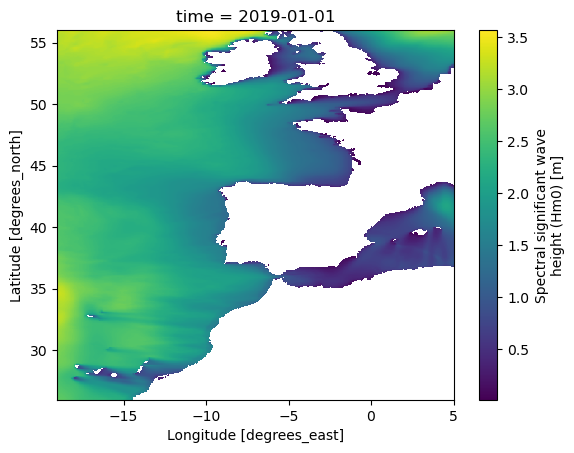

In [8]:
ds1.VHM0.loc['2019-01-01T00:00:00.000000000', :, :].plot() 

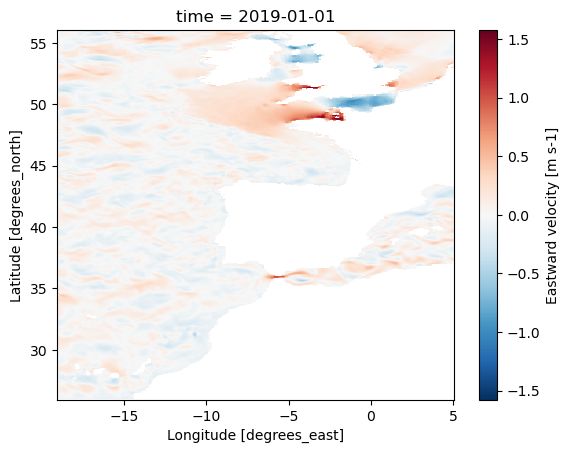

In [9]:
ds2.uo.interp(time=['2019-01-01T00:00:00.000000000'], method='linear').plot() 

# Método K Means

## Revisión del método

Completar ...

## Pre-proceso

- Seleccionamos dos de las variables para hacer el clustering, en este caso HS y TP

In [66]:
lat = 30
long = -15

date_i='2020-08-01T00:00:00.000000000'
date_f='2020-10-01T00:00:00.000000000'
date_i2='2020-07-31T00:30:00.000000000'
date_f2='2020-10-01T00:30:00.000000000'

DIR = ds1.VMDR.loc[date_i:date_f, lat, long]
HS = ds1.VHM0.loc[date_i:date_f,  lat, long]
TP = ds1.VTM01_SW1.loc[date_i:date_f,  lat, long]

print('interpolation 1')
U=ds3.utotal.loc[date_i2:date_f2, :,lat,long]
U = U.interp(time=DIR.time.values[:], method='linear')

print('interpolation 2')
V=ds3.vtotal.loc[date_i2:date_f2, :,lat,long]
V = V.interp(time=DIR.time.values[:], method='linear')


U=U.values.reshape((1,len(U)))
V=V.values.reshape((1,len(V)))


EW=ds4.eastward_wind.loc[date_i:date_f].sel(lat=lat, lon=long, method="nearest")
EW

interpolation 1
interpolation 2


<xarray.DataArray 'eastward_wind' (time: 1465)>
[1465 values with dtype=float32]
Coordinates:
    lat      float32 30.06
    lon      float32 -14.94
  * time     (time) datetime64[ns] 2020-08-01 2020-08-01T01:00:00 ... 2020-10-01
Attributes:
    units:          m s-1
    long_name:      stress-equivalent wind eastward component at 10 m
    standard_name:  eastward_wind
    valid_min:      -5000
    valid_max:      5000
    _ChunkSizes:    [1, 720, 1440]

In [48]:
print('DIR:',DIR.attrs['standard_name'])
print('HS:',HS.attrs['standard_name'])
print('TP:',TP.attrs['standard_name'])
print('U:',U.attrs['standard_name'])
print('V:',V.attrs['standard_name'])
print('EW:',EW.attrs['standard_name'])

DIR: sea_surface_wave_from_direction
HS: sea_surface_wave_significant_height
TP: sea_surface_primary_swell_wave_mean_period
U: surface_sea_water_x_velocity
V: surface_sea_water_y_velocity
EW: eastward_wind


- Utilizamos Seaborn para hacer pair plots

In [137]:
#We must reshape U and V to create the data frame
Ur=U.values.reshape(len(U))
Vr=V.values.reshape(len(U))

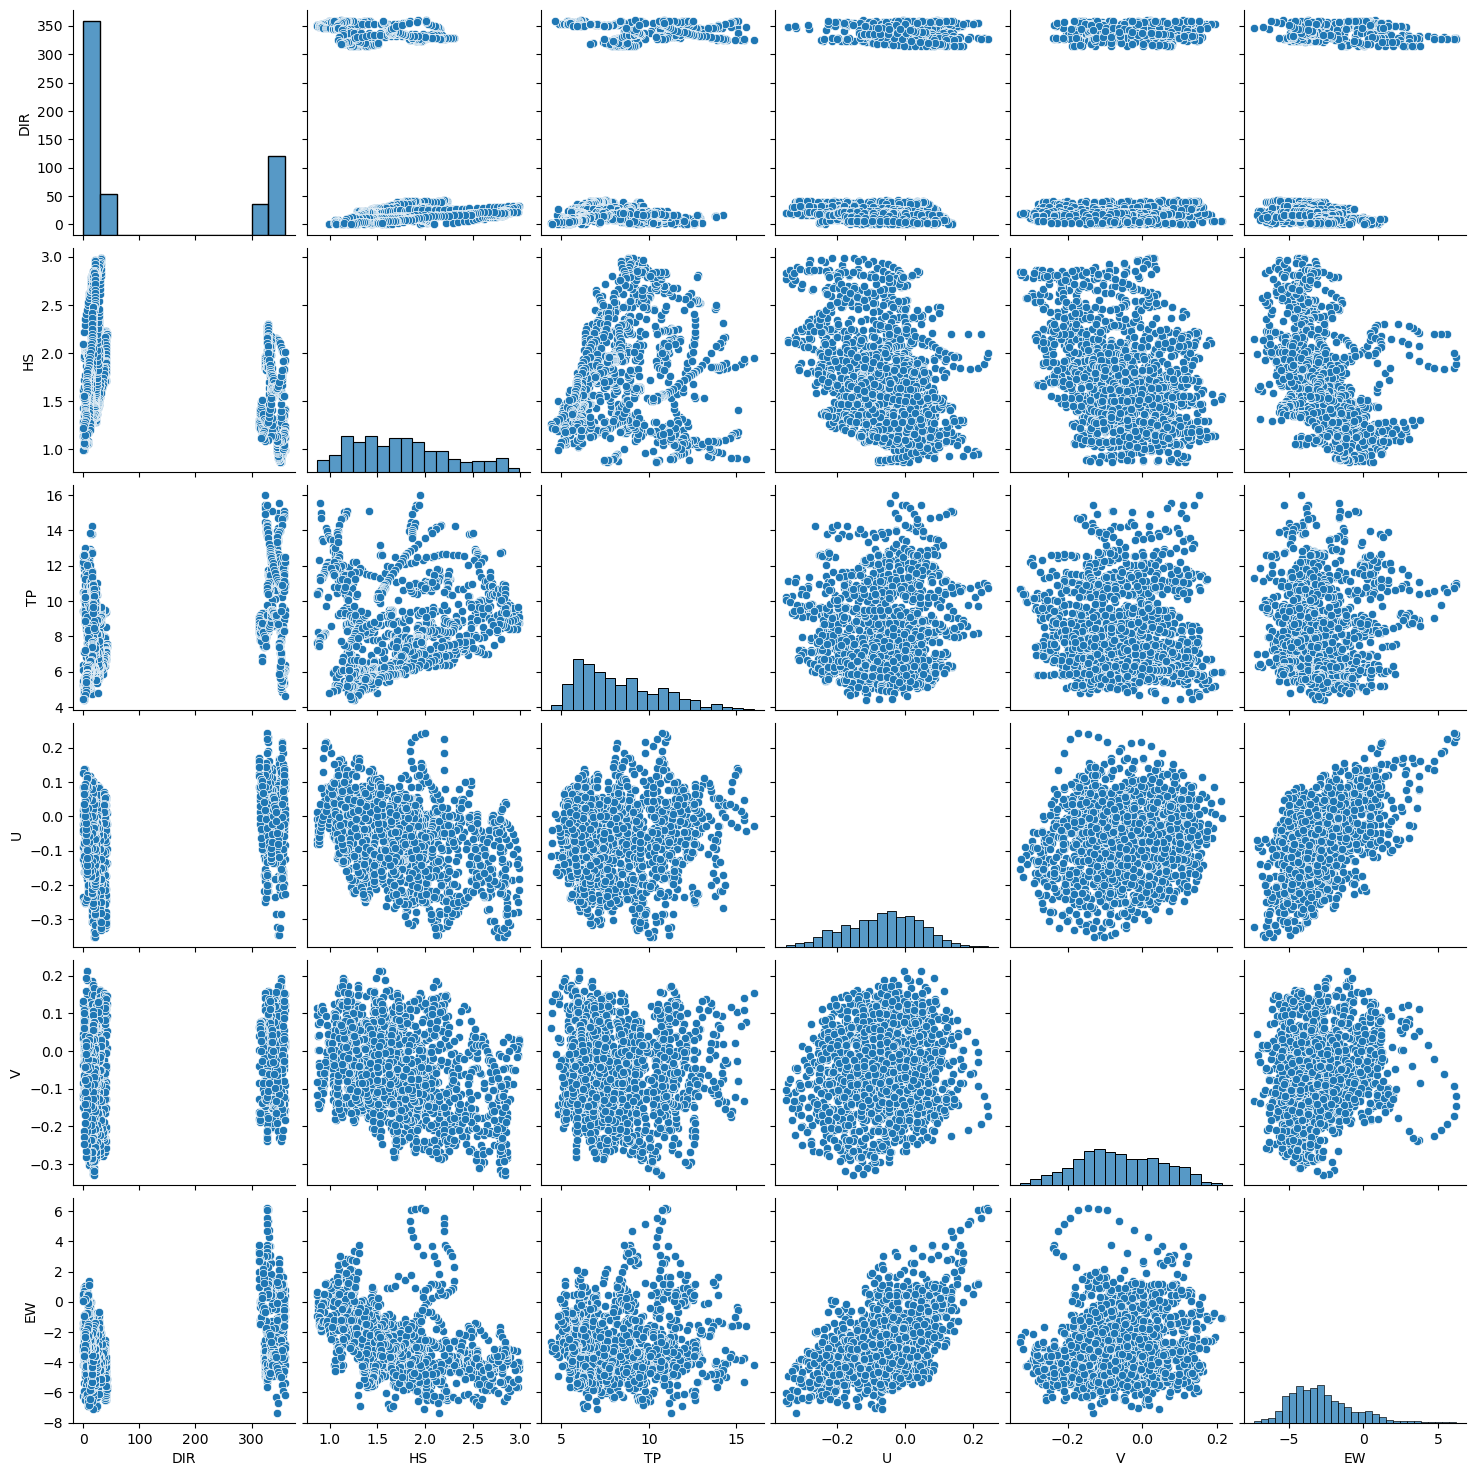

In [142]:
import seaborn as sns
import pandas as pd 

#Creating the data frame
X=pd.DataFrame({'DIR':DIR,'HS':HS,'TP':TP,'U':Ur,'V':Vr,'EW':EW})

#Building the pairplot
sns.pairplot(X)

## Kmeans

- Utilizamos la librería sklearn para aplicar el Kmeans. Lo primero que tenemos que hacer es escalar los datos.

In [256]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
import numpy as np

X=np.array([DIR,HS,TP,Ur,Vr,EW]).T

# Standardize data
scaler = StandardScaler()
X_s=scaler.fit_transform(X)

# Normalizing the Data 
X_n= normalize(X_s) 

# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_n) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

P1        P2
0 -0.082317 -0.681830
1 -0.115546 -0.735679

C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

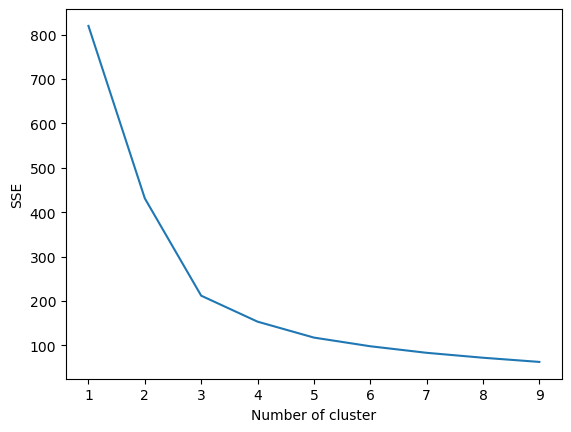

In [257]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [260]:
k = 3
k_means = KMeans(init="random",n_clusters=k,n_init=10)
k_means.fit(X_principal)

# centroides = scaler.inverse_transform(k_means.cluster_centers_)
etiquetas = k_means.labels_

# # lowest SSE value
# inertia=k_means.inertia_

# # Number of iterations required to converge
# niter=k_means.n_iter_

C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Graficamos los resultados:

In [254]:
# import matplotlib.pyplot as plt

# plt.plot(X[etiquetas==0,0],X[etiquetas==0,1],'.',color='turquoise', label='cluster 1')
# plt.plot(X[etiquetas==1,0],X[etiquetas==1,1],'.', color='tab:blue',label='cluster 2')
# plt.plot(X[etiquetas==2,0],X[etiquetas==2,1],'.', color='tab:orange',label='cluster 2')

# plt.plot(centroides[0,0],centroides[0,1],'kx',markersize=8, label='centroides')
# plt.plot(centroides[1,0],centroides[1,1],'kx',markersize=8, label='centroides')
# plt.plot(centroides[2,0],centroides[2,1],'kx',markersize=8, label='centroides')

# plt.xlabel('HS')
# plt.ylabel('TP')

- Podemos volver a hacer el pairs plot, esta vez con las clasificaciones. Referencia colores: [palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

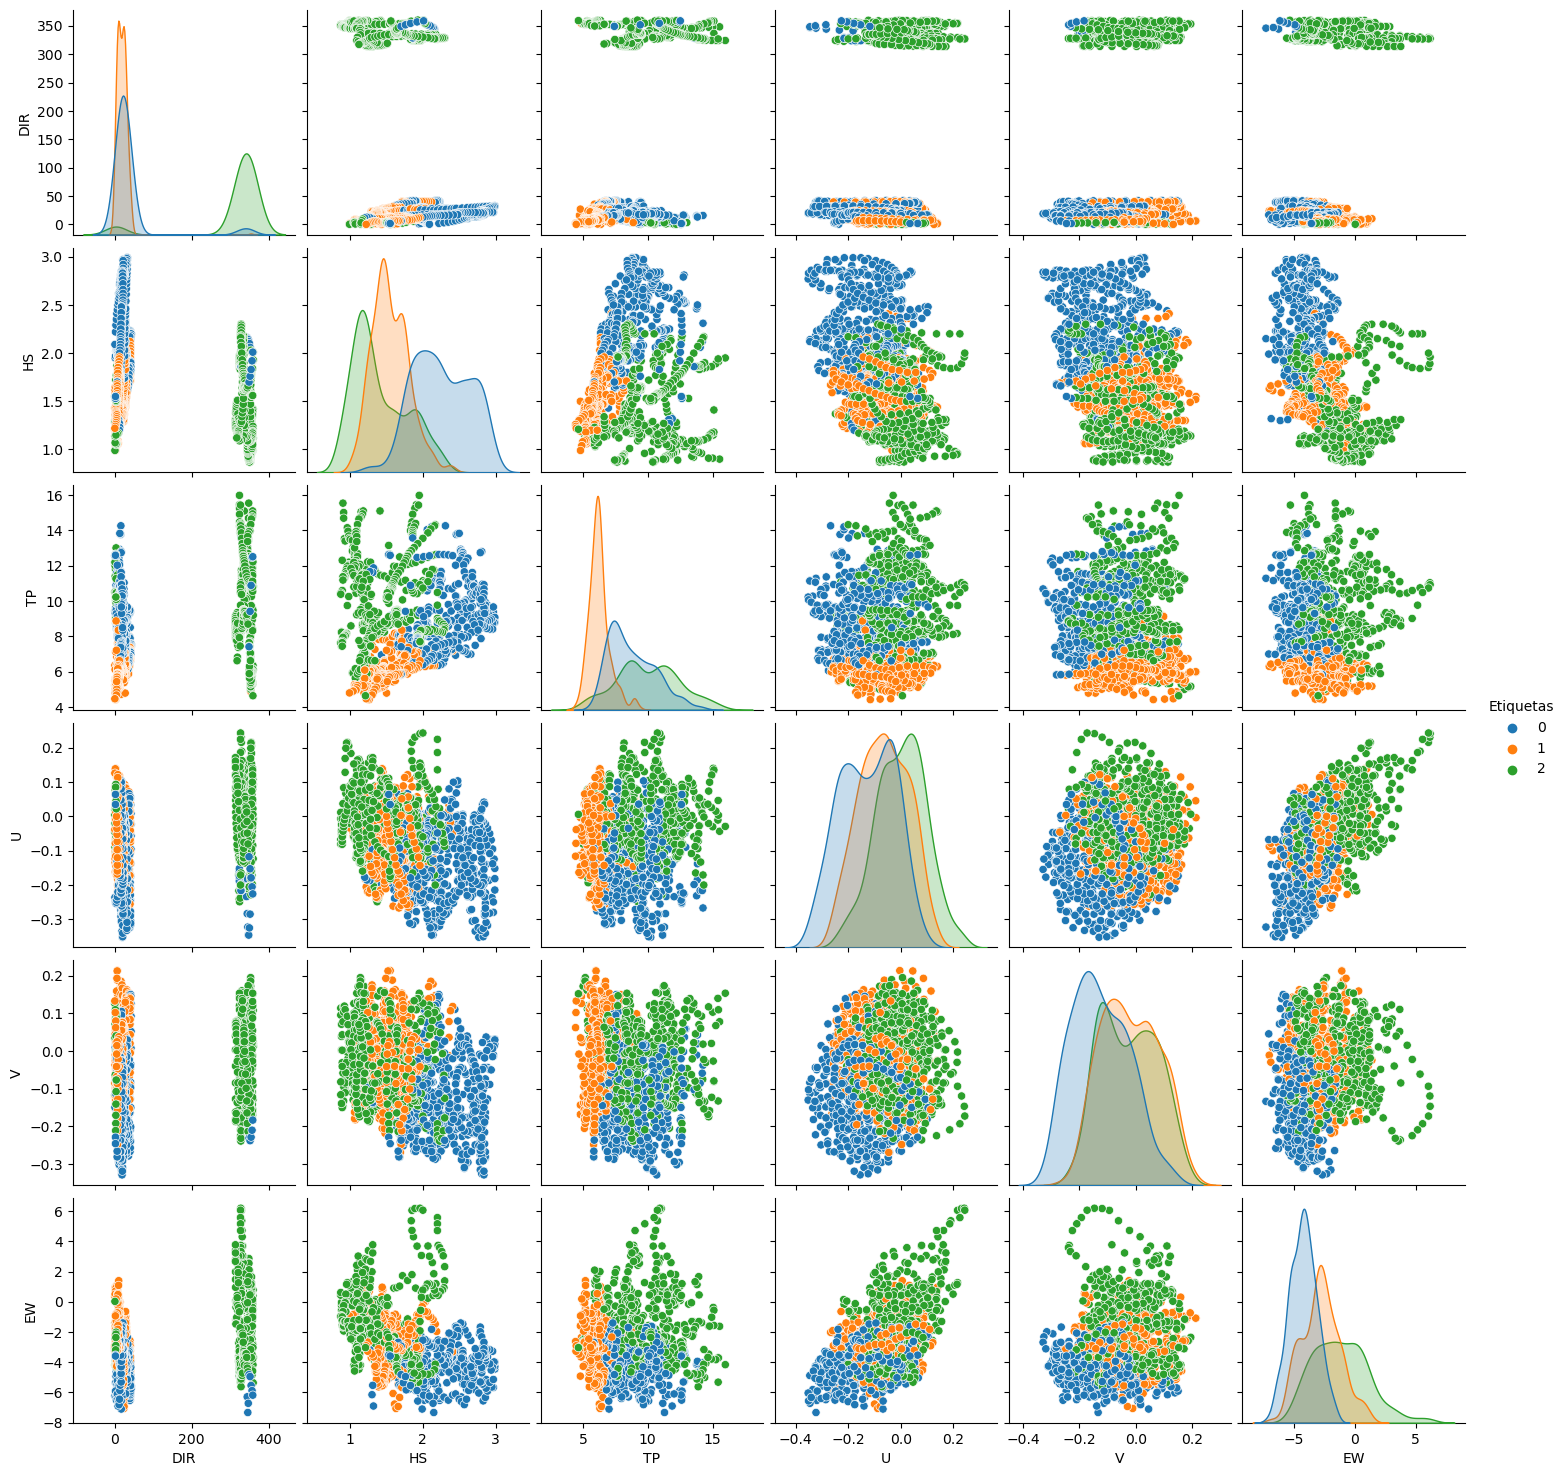

In [261]:
X_c=pd.DataFrame({'DIR':DIR,'HS':HS,'TP':TP,'U':Ur,'V':Vr,'EW':EW,'Etiquetas':etiquetas})

sns.pairplot(X_c,hue="Etiquetas",palette='tab10')

## Elección de k

### Método del códo

SSE: sum of square error

\begin{equation}
SSE = \sum_{i=1}^{n} (X_i-\bar{X})
\end{equation}

C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib

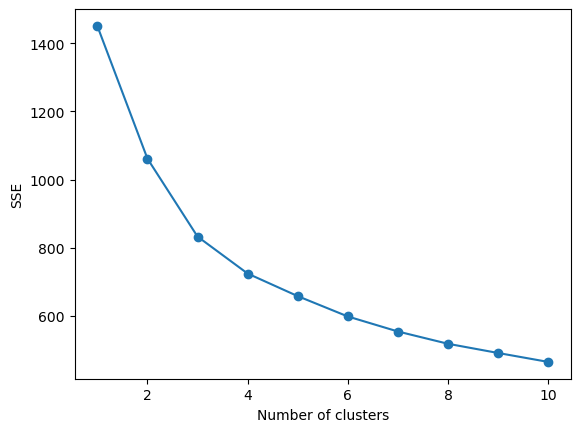

In [252]:
# calculate distortion for a range of number of cluster
distortions = []
silhouette_coefficients = []

for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_n)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

Podemos utilizar la librería kneed para encontrar el codo.

In [253]:
from kneed import KneeLocator, DataGenerator as dg 
kl = KneeLocator(
       range(1, 11), distortions, curve="convex", direction="decreasing"
       )

kl.elbow 

3

### Método de ["silhouette coefficients"](https://es.wikipedia.org/wiki/Silhouette_(clustering)) 

Distancia media de los puntos dentro de un cluster:

\begin{equation}
a(i)=\frac{1}{|C_I|-1}\sum_{j \in C_I, i\neq j} d(i,j)
\end{equation}

Distancia mínima del a los puntos de los otros clasters:

\begin{equation}
b(i)= min\frac{1}{|C_k|}\sum_{j \in C_k} d(i,j), \ \ k\neq I
\end{equation}

La "silhpuette" para un punto i es:

\begin{equation}
s(i)= \frac{b(i)-a(i)}{max (b(i),a(i))}, \ \ si |C_I| > 1
\end{equation}

C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib

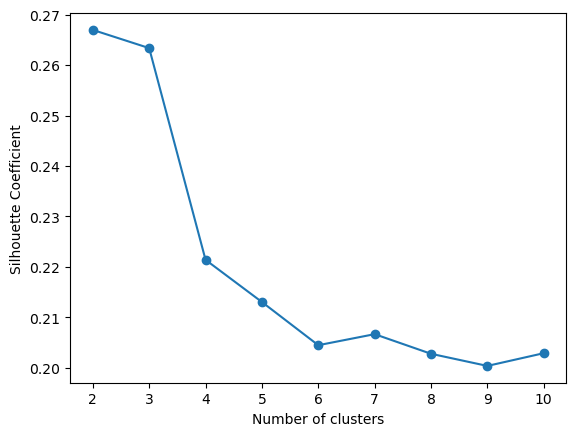

In [149]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for i in range(2, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_s)
    score = silhouette_score(X_s, km.labels_)
    
    silhouette_coefficients.append(score)

# plot
plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

# Comparación de métodos

## Método [DBSCAN](https://es.wikipedia.org/wiki/DBSCAN)

Revisión del método. Completar ...

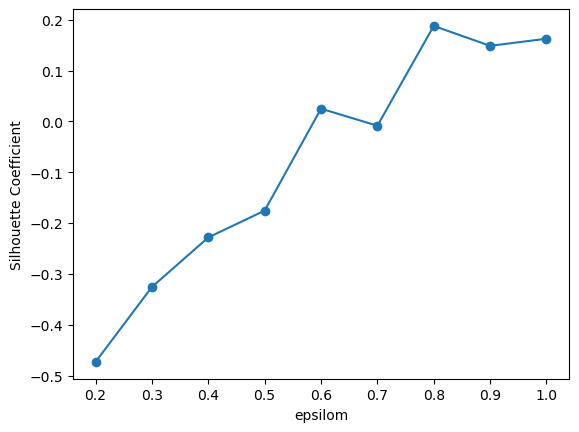

In [236]:
from sklearn.metrics import silhouette_score

silhouette_coefficients_sb = []

for i in range(2, 11):
    dbscan = DBSCAN(i/10
    )
    dbscan.fit(X)
    score_sb = silhouette_score(X, dbscan.labels_)
    
    silhouette_coefficients_sb.append(score_sb)

# plot
plt.plot(np.arange(2, 11)/10, silhouette_coefficients_sb, marker='o')
plt.xlabel('epsilom')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [240]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

# Instantiate k-means and dbscan algorithms
# kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.6)

# Fit the algorithms to the features
# kmeans.fit(X_s)
dbscan.fit(X)

# Compute the silhouette scores for each algorithm
# kmeans_silhouette = silhouette_score(
#      X_s, kmeans.labels_
#     ).round(2)
dbscan_silhouette = silhouette_score(
X, dbscan.labels_
    ).round (2)

In [241]:
etiquetas_dbscan=dbscan.labels_

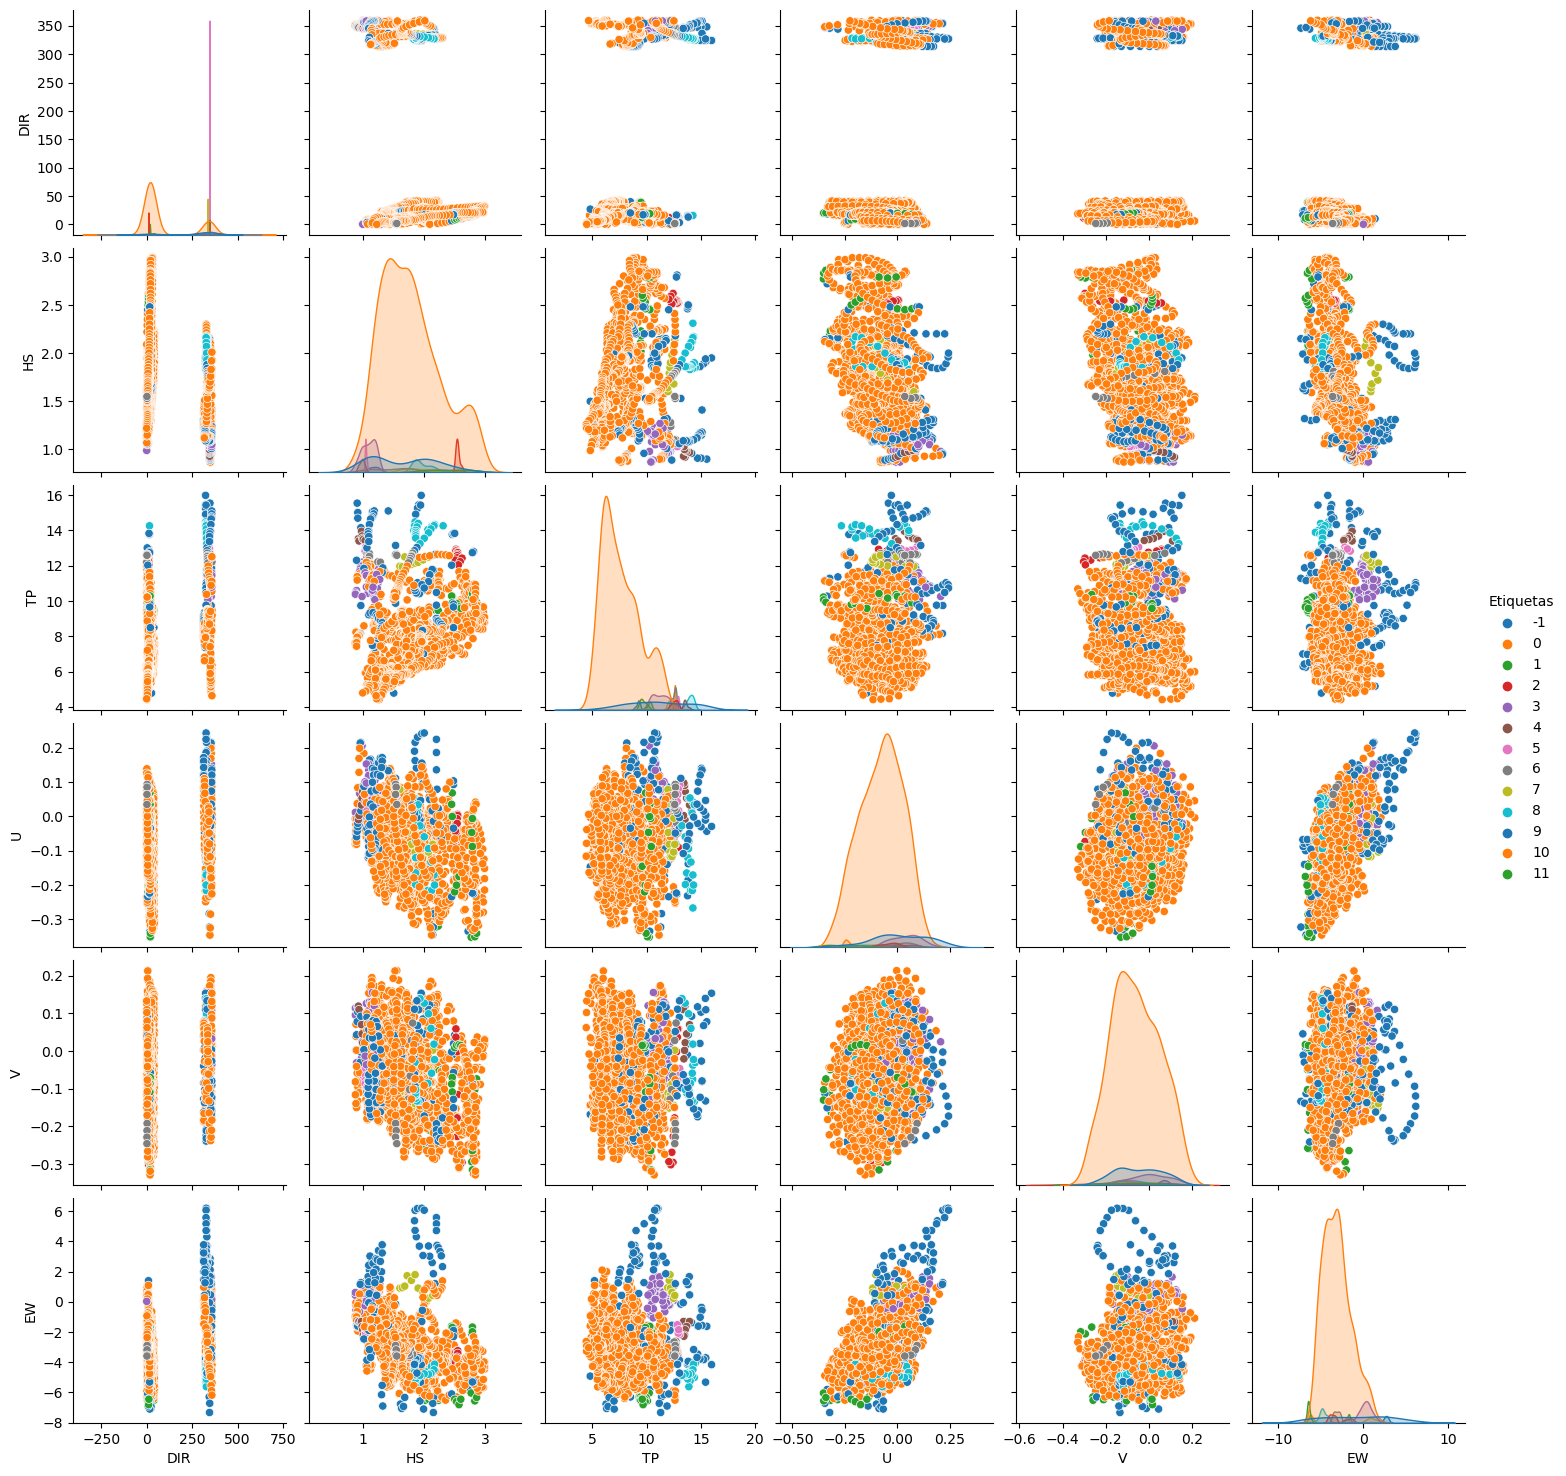

In [242]:
X_c=pd.DataFrame({'DIR':DIR,'HS':HS,'TP':TP,'U':Ur,'V':Vr,'EW':EW,'Etiquetas':etiquetas_dbscan})

sns.pairplot(X_c,hue="Etiquetas",palette='tab10')

In [19]:
kmeans_silhouette

0.39

In [20]:
dbscan_silhouette 

0.33

# Con PCAs

In [159]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [160]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [161]:
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

modelo_pca.components_

array([[ 4.12882962e-01,  5.76304152e-01,  5.76304152e-01,
        -2.00991975e-01, -2.20199644e-01, -2.76385693e-01],
       [-3.68317455e-01,  3.83502066e-01,  3.83502066e-01,
         5.19404987e-01,  2.04324898e-01,  5.08590580e-01],
       [ 1.65786449e-01, -1.00641624e-01, -1.00641624e-01,
         3.37633623e-01, -8.72485008e-01,  2.77544280e-01],
       [ 7.68419473e-01, -1.03273065e-01, -1.03273065e-01,
         4.91434849e-01,  3.78547059e-01,  5.82646899e-02],
       [ 2.75529088e-01, -2.37219287e-03, -2.37219287e-03,
        -5.78200667e-01,  7.23566694e-02,  7.64539710e-01],
       [-2.16726060e-16, -7.07106781e-01,  7.07106781e-01,
         1.34650846e-17, -9.71166939e-17,  3.53042427e-17]])

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------


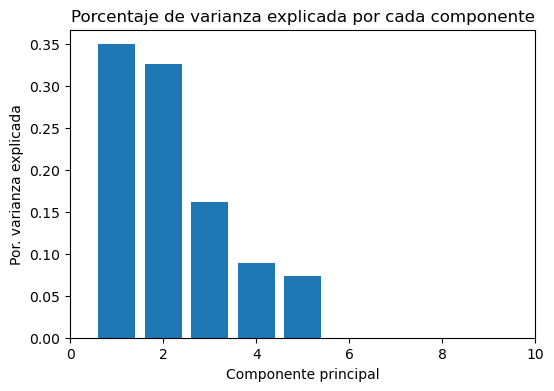

In [162]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
#print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

#for x, y in zip(np.arange(len(X[0,:])) + 1, modelo_pca.explained_variance_ratio_):
#    label = round(y, 2)
#    ax.annotate(
#        label,
#        (x,y),
#        textcoords="offset points",
#        xytext=(0,10),
#        ha='center'
#    )

#ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_xlim(0, 10)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------


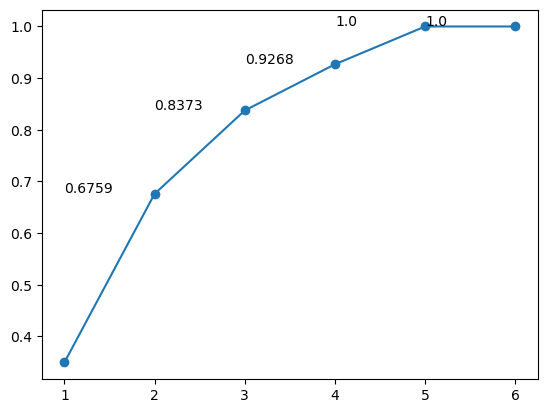

In [182]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
#print(prop_varianza_acum)

fig, ax = plt.subplots(1, 1)
ax.plot(
    np.arange(len(X[0,:])) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for i in range(1,len(prop_varianza_acum)):
    y = prop_varianza_acum[i]
    label = round(y, 4)
    ax.text(i,label+0.002, str(label), fontsize=10, color='black')


# ax.set_xlim(0, 10)
# #ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
# ax.set_title('Porcentaje de varianza explicada acumulada')
# ax.set_xlabel('Componente principal')
# ax.set_ylabel('Por. varianza acumulada');

Las primeras 5 explican el 100% de los datos

In [183]:
#transformacion

# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=X)
proyecciones_pd = pd.DataFrame(
    proyecciones[:,0:5],
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
)
proyecciones_pd.head()

PC1       PC2       PC3       PC4       PC5
0 -1.828473 -0.543799  0.780846 -0.337203 -0.775625
1 -1.802279 -0.625235  0.647341 -0.535899 -0.431882
2 -1.847246 -0.710970  0.500560 -0.680965 -0.128830
3 -1.958834 -0.733004  0.374278 -0.733938  0.161344
4 -2.027545 -0.667896  0.211822 -0.721453  0.342966

In [184]:
X_PC = proyecciones[:,0:5]

In [185]:
X_PC.shape

(1465, 5)

In [194]:
scaler_PC = StandardScaler()

X_PC_s=scaler_PC.fit_transform(X_PC)

In [201]:
k = 4
k_means_PC = KMeans(init="random",n_clusters=k,n_init=10)
k_means_PC.fit(X_PC_s)

centroides_PC = scaler_PC.inverse_transform(k_means_PC.cluster_centers_)
etiquetas_PC = k_means_PC.labels_

# lowest SSE value
inertia_PC=k_means_PC.inertia_

# Number of iterations required to converge
niter_PC=k_means_PC.n_iter_

C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


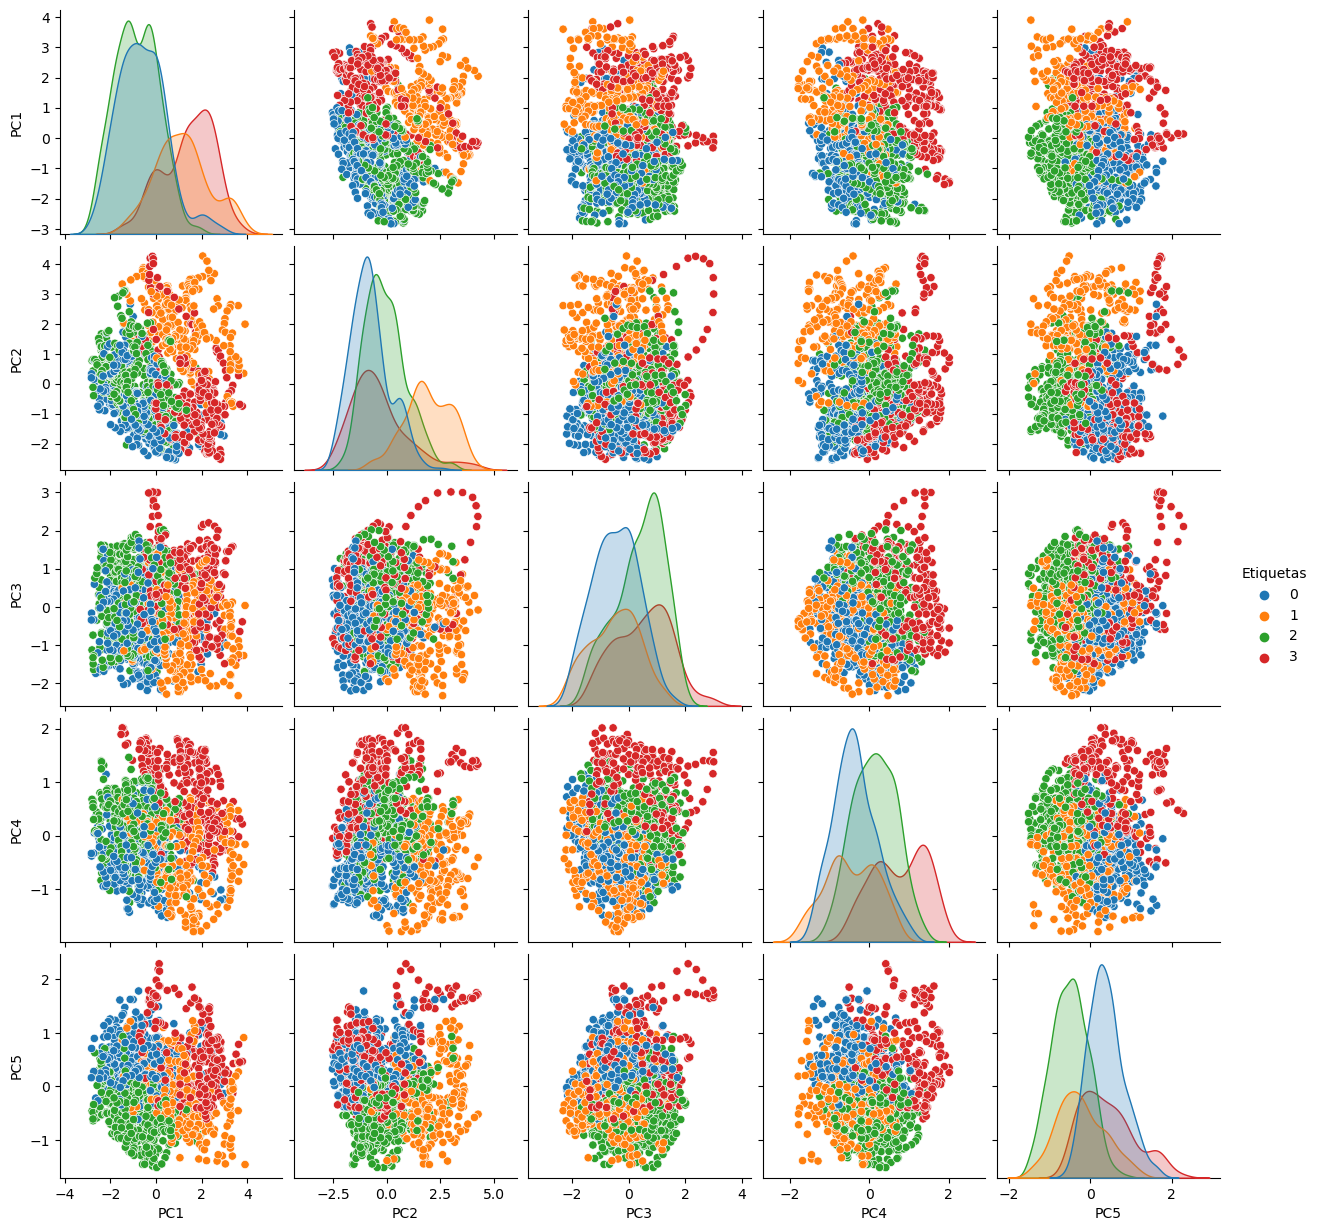

In [202]:
X_PC_c=pd.DataFrame({'PC1':proyecciones_pd['PC1'],
                  'PC2':proyecciones_pd['PC2'],
                  'PC3':proyecciones_pd['PC3'],
                  'PC4':proyecciones_pd['PC4'],
                  'PC5':proyecciones_pd['PC5'],
                  'Etiquetas':etiquetas_PC})

sns.pairplot(X_PC_c,hue="Etiquetas",palette='tab10')

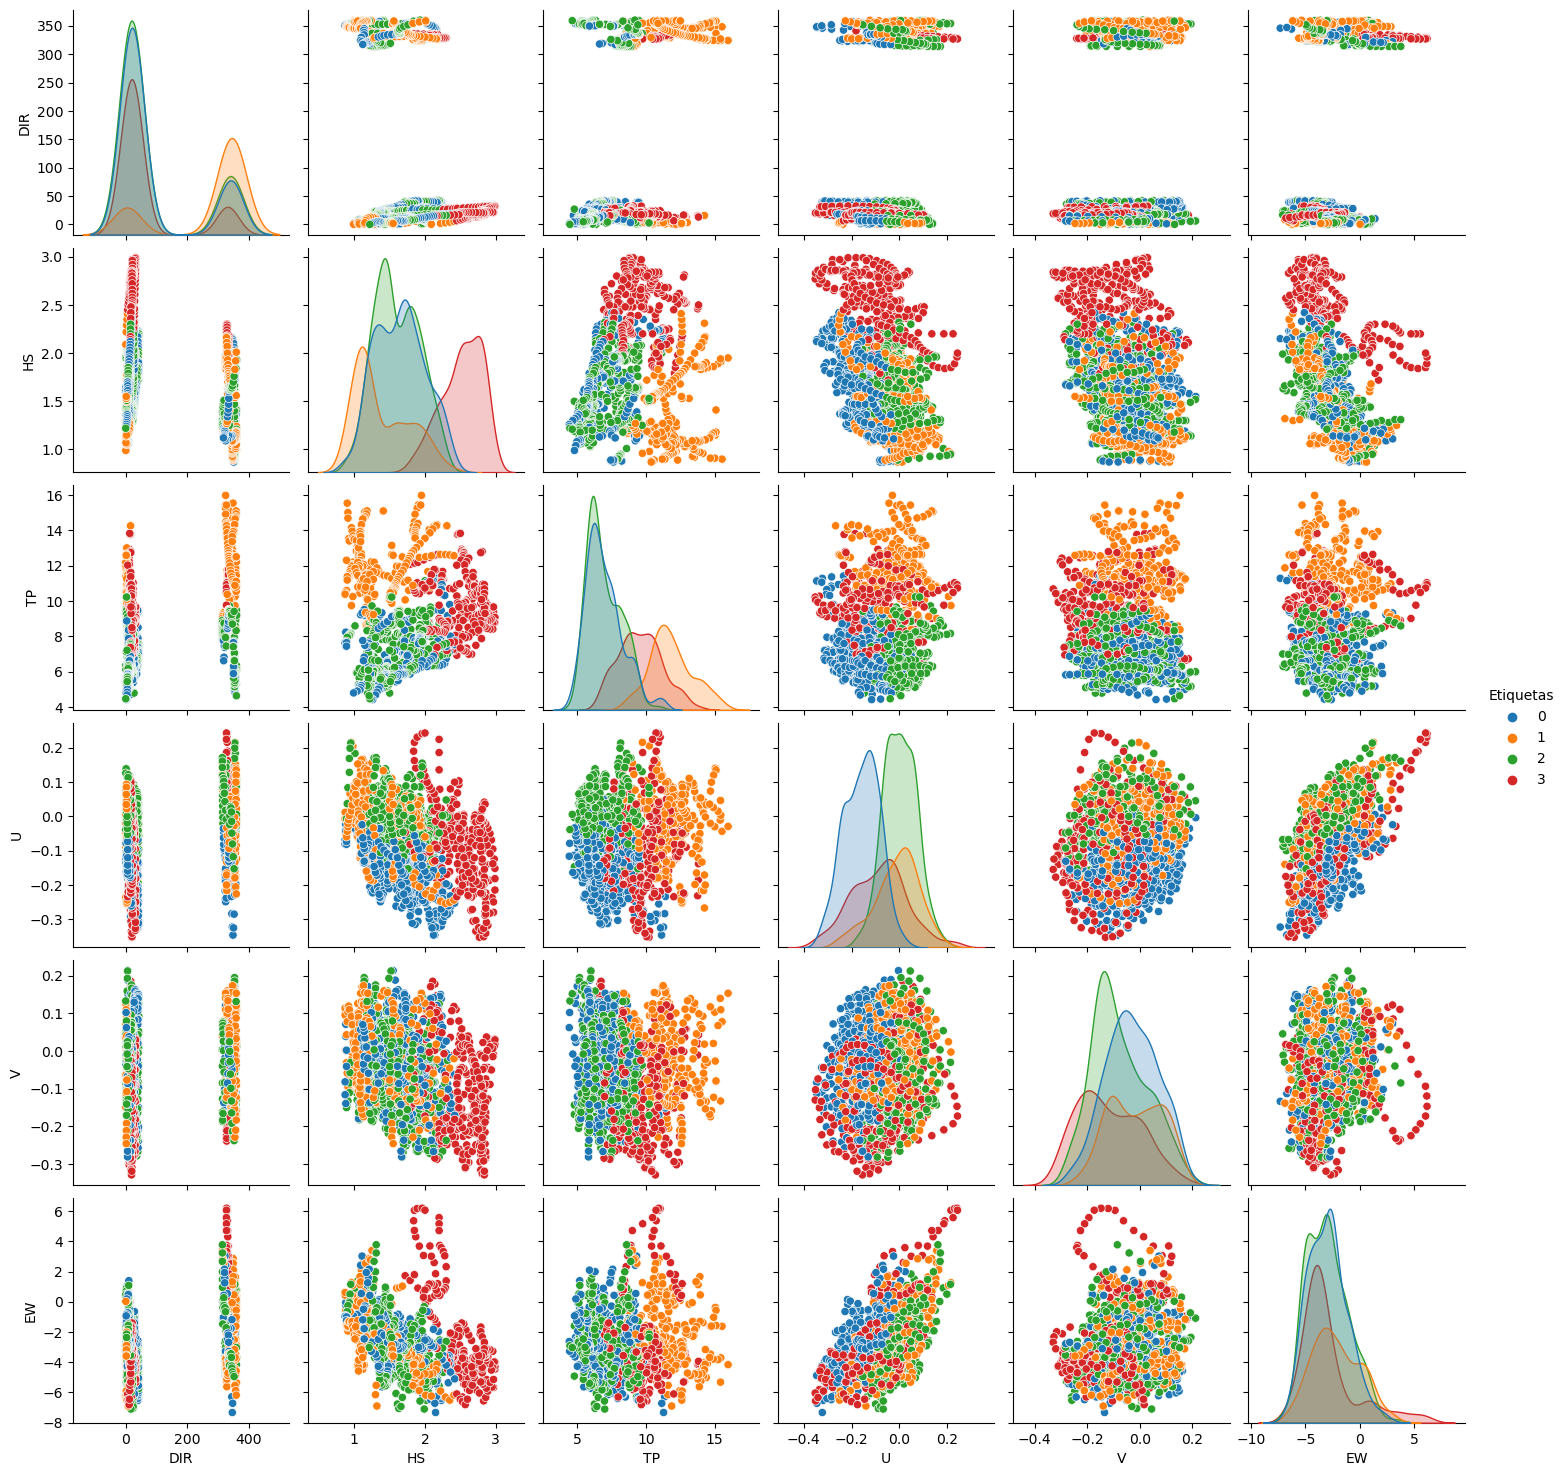

In [203]:
X_cp=pd.DataFrame({'DIR':DIR,'HS':HS,'TP':TP,'U':Ur,'V':Vr,'EW':EW,'Etiquetas':etiquetas_PC})

sns.pairplot(X_cp,hue="Etiquetas",palette='tab10')

C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib

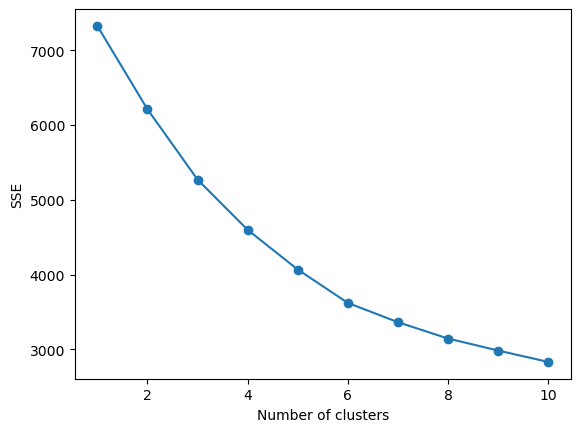

In [204]:
# calculate distortion for a range of number of cluster
distortions_PC = []

for i in range(1, 11):
    km_PC = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km_PC.fit(X_PC_s)
    distortions_PC.append(km_PC.inertia_)

# plot
plt.plot(range(1, 11), distortions_PC, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [209]:
distortions_PC[4]

4067.3685444039347

In [210]:
distortions[4]

3931.0350601060036